In [1]:
!nvidia-smi

Mon Aug 14 06:11:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  TCC  | 00000000:1B:00.0 Off |                    0 |
| N/A   29C    P0    32W / 250W |      1MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
!conda env list

# conda environments:
#
base                     C:\ProgramData\anaconda3
tf                       C:\Users\user01\.conda\envs\tf
tf2                      C:\Users\user01\.conda\envs\tf2
torch2                *  C:\Users\user01\.conda\envs\torch2



In [4]:
from glob import glob
import re
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

In [5]:
def show_chest(image_file_name):
    origin_path = "data/images/images_normalized/"
    image_path = origin_path + image_file_name
    plt.figure()
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    print(image_file_name)
    plt.imshow(image)

In [6]:
image_path = "data/images/images_normalized/"
images = glob(image_path + "*.png")
len(images)

7470

In [7]:
# Read in the projections data
projections = pd.read_csv('data/indiana_projections.csv')

# Read in the reports data
reports = pd.read_csv('data/indiana_reports.csv')

# Define the path to the images folder
images_folder = image_path

# Merge the projections and reports data on the UID column
reports = pd.merge(projections, reports, on='uid')

reports = reports[['uid', 'filename', 'projection', 'findings']]

In [8]:
reports

,uid,filename,projection,findings
0,1,1_IM-0001-4001.dcm.png,Frontal,The cardiac silhouette and mediastinum size ar...
1,1,1_IM-0001-3001.dcm.png,Lateral,The cardiac silhouette and mediastinum size ar...
2,2,2_IM-0652-1001.dcm.png,Frontal,Borderline cardiomegaly. Midline sternotomy XX...
3,2,2_IM-0652-2001.dcm.png,Lateral,Borderline cardiomegaly. Midline sternotomy XX...
4,3,3_IM-1384-1001.dcm.png,Frontal,NaN
...,...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral,"Heart size within normal limits. Small, nodula..."
7462,3998,3998_IM-2048-1001.dcm.png,Frontal,NaN
7463,3998,3998_IM-2048-1002.dcm.png,Lateral,NaN
7464,3999,3999_IM-2049-1001.dcm.png,Frontal,NaN


In [9]:
reports.isna().sum()

uid             0
filename        0
projection      0
findings      997
dtype: int64

In [10]:
reports.dropna(subset = ['findings'], inplace = True)

In [11]:
reports.info()
reports.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6469 entries, 0 to 7461
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         6469 non-null   int64 
 1   filename    6469 non-null   object
 2   projection  6469 non-null   object
 3   findings    6469 non-null   object
dtypes: int64(1), object(3)
memory usage: 252.7+ KB


,uid,filename,projection,findings
0,1,1_IM-0001-4001.dcm.png,Frontal,The cardiac silhouette and mediastinum size ar...
1,1,1_IM-0001-3001.dcm.png,Lateral,The cardiac silhouette and mediastinum size ar...
2,2,2_IM-0652-1001.dcm.png,Frontal,Borderline cardiomegaly. Midline sternotomy XX...
3,2,2_IM-0652-2001.dcm.png,Lateral,Borderline cardiomegaly. Midline sternotomy XX...
6,4,4_IM-2050-1001.dcm.png,Frontal,There are diffuse bilateral interstitial and a...


In [12]:
reports = reports[reports.projection == "Frontal"].drop_duplicates(subset = 'uid')
reports.reset_index(drop = True, inplace = True)
reports

,uid,filename,projection,findings
0,1,1_IM-0001-4001.dcm.png,Frontal,The cardiac silhouette and mediastinum size ar...
1,2,2_IM-0652-1001.dcm.png,Frontal,Borderline cardiomegaly. Midline sternotomy XX...
2,4,4_IM-2050-1001.dcm.png,Frontal,There are diffuse bilateral interstitial and a...
3,5,5_IM-2117-1003002.dcm.png,Frontal,The cardiomediastinal silhouette and pulmonary...
4,6,6_IM-2192-1001.dcm.png,Frontal,Heart size and mediastinal contour are within ...
...,...,...,...,...
3194,3993,3993_IM-2044-1001.dcm.png,Frontal,The heart is mildly enlarged. Left hemidiaphra...
3195,3994,3994_IM-2045-2001.dcm.png,Frontal,Similar mild cardiomegaly. Of the pulmonary va...
3196,3995,3995_IM-2046-1001.dcm.png,Frontal,The cardiomediastinal silhouette and pulmonary...
3197,3996,3996_IM-2047-1001.dcm.png,Frontal,The lungs are clear. Heart size is normal. No ...


In [13]:
image_per_subject = pd.DataFrame(columns = ['uid', 'num_images'])
image_per_subject['uid'] = reports['uid'].value_counts().index
image_per_subject['num_images'] = reports['uid'].value_counts().values
image_per_subject['num_images'].value_counts()

num_images
1    3199
Name: count, dtype: int64

1_IM-0001-4001.dcm.png
2_IM-0652-1001.dcm.png
4_IM-2050-1001.dcm.png
5_IM-2117-1003002.dcm.png
6_IM-2192-1001.dcm.png


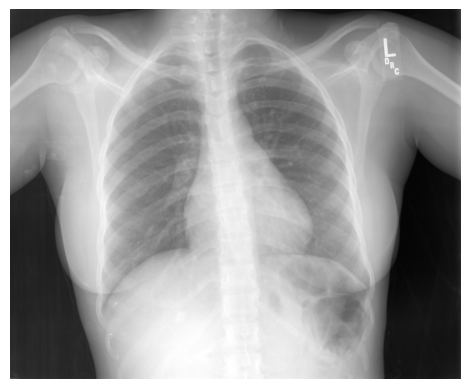

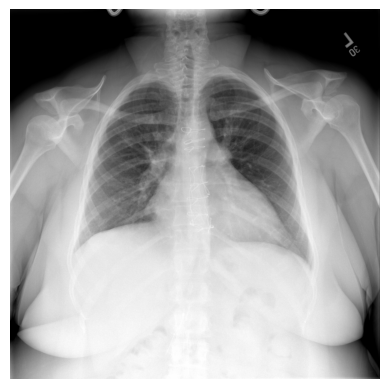

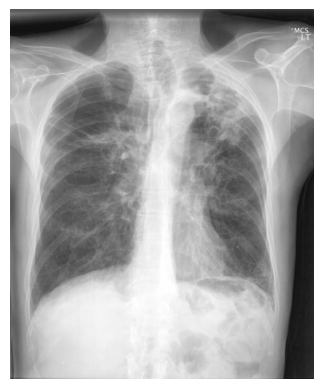

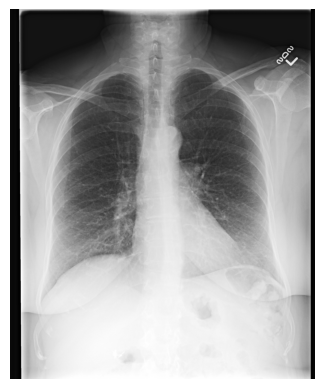

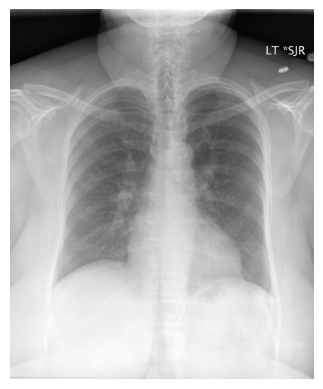

In [14]:
sample_front_chest = reports['filename'].head(5).values

for img in sample_front_chest:
    show_chest(img)

In [15]:
class TextPreprocessing:
    
    def __lowercase(self, text):
        '''Converts to lowercase'''
        new_text = []
        for line in text:
            new_text.append(line.lower())
        
        clear_output(wait=True)
        print("1. lowercase finished successfully!")
        return new_text

    def __decontractions(self, text):
        '''Performs decontractions in the doc'''
        new_text = []
        for phrase in text:
            phrase = re.sub(r"won't", "will not", phrase)
            phrase = re.sub(r"can\'t", "can not", phrase)
            phrase = re.sub(r"couldn\'t", "could not", phrase)
            phrase = re.sub(r"shouldn\'t", "should not", phrase)
            phrase = re.sub(r"wouldn\'t", "would not", phrase)
            # general
            phrase = re.sub(r"n\'t", " not", phrase)
            phrase = re.sub(r"\'re", " are", phrase)
            phrase = re.sub(r"\'s", " is", phrase)
            phrase = re.sub(r"\'d", " would", phrase)
            phrase = re.sub(r"\'ll", " will", phrase)
            phrase = re.sub(r"\'t", " not", phrase)
            phrase = re.sub(r"\'ve", " have", phrase)
            phrase = re.sub(r"\'m", " am", phrase)
            phrase = re.sub(r"\*+", "abuse", phrase)
            new_text.append(phrase)
            
        clear_output(wait=True)
        print("2. decontractions finished successfully!")
        return new_text

    def __rem_punctuations(self, text):
        '''Removes punctuations'''
        punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
        new_text = []
        for line in text:
            for char in line:
                if char in punctuations: 
                    line = line.replace(char, "")
            new_text.append(' '.join(e for e in line.split()))
        
        clear_output(wait=True)
        print("3. remove punctuations finished successfully!")
        return new_text

    def __rem_numbers(self, text):
        '''Removes numbers and irrelevant text like xxxx*'''
        new_text = []
        for line in text:
            temp = re.sub(r'x*','',line)
            new_text.append(re.sub(r'\d','',temp))
            
        clear_output(wait=True)
        print("4. remove numbers finished successfully!")
        return new_text

    def __words_filter(self, text):
        '''Removes words less than 2 characters except no and ct'''
        new_text = []
        for line in text:
            temp = line.split()
            temp2 = []
            for word in temp:
                if  len(word) <=2 and word != 'no' and word != 'ct':
                    continue
                else:
                    temp2.append(word)
            new_text.append(' '.join(e for e in temp2))
            
        clear_output(wait=True)
        print("5. words filter finished successfully!")
        return new_text

    def __multiple_fullstops(self, text):
        ''' Removes multiple full stops from the text'''
        new_text = []
        for line in text:
            new_text.append(re.sub(r'\.\.+', '.', line))
            
        clear_output(wait=True)
        print("6. multiple fullstop finished successfully!")
        return new_text

    def __fullstops(self, text):
        new_text = []
        for line in text:
            new_text.append(re.sub('\.', ' .', line))
            
        clear_output(wait=True)
        print("7. fullstop finished successfully!")
        return new_text

    def __multiple_spaces(self, text):
        new_text = []
        for line in text:
            new_text.append(' '.join(e for e in line.split()))
            
        clear_output(wait=True)
        print("8. multiple spaces finished successfully!")
        return new_text

    def __separting_startg_words(self, text):
        new_text = []
        for line in text:
            temp = []
            words = line.split()
            for i in words:
                if i.startswith('.') == False:
                    temp.append(i)
                else:
                    w = i.replace('.','. ')
                    temp.append(w)
            new_text.append(' '.join(e for e in temp))
            
        clear_output(wait=True)
        print("9. separting start words finished successfully!")
        return new_text

    def __rem_apostrophes(self, text):
        new_text = []
        for line in text:
            new_text.append(re.sub("'",'',line))
            
        clear_output(wait=True)
        print("10. remove apostrophes words finished successfully!")
        return new_text

    def text_preprocessing(self, text):
        '''Combines all the preprocess functions'''
        new_text = self.__lowercase(text)
        new_text = self.__decontractions(new_text)
        new_text = self.__rem_punctuations(new_text)
        new_text = self.__rem_numbers(new_text)
        new_text = self.__words_filter(new_text)
        new_text = self.__multiple_fullstops(new_text)
        new_text = self.__fullstops(new_text)
        new_text = self.__multiple_spaces(new_text)
        new_text = self.__separting_startg_words(new_text)
        new_text = self.__rem_apostrophes(new_text)
        return new_text

In [16]:
text_preprocessing = TextPreprocessing()
reports['findings_preprocess'] = text_preprocessing.text_preprocessing(reports['findings'])

10. remove apostrophes words finished successfully!


In [17]:
reports

,uid,filename,projection,findings,findings_preprocess
0,1,1_IM-0001-4001.dcm.png,Frontal,The cardiac silhouette and mediastinum size ar...,the cardiac silhouette and mediastinum size ar...
1,2,2_IM-0652-1001.dcm.png,Frontal,Borderline cardiomegaly. Midline sternotomy XX...,borderline cardiomegaly . midline sternotomy ...
2,4,4_IM-2050-1001.dcm.png,Frontal,There are diffuse bilateral interstitial and a...,there are diffuse bilateral interstitial and a...
3,5,5_IM-2117-1003002.dcm.png,Frontal,The cardiomediastinal silhouette and pulmonary...,the cardiomediastinal silhouette and pulmonary...
4,6,6_IM-2192-1001.dcm.png,Frontal,Heart size and mediastinal contour are within ...,heart size and mediastinal contour are within ...
...,...,...,...,...,...
3194,3993,3993_IM-2044-1001.dcm.png,Frontal,The heart is mildly enlarged. Left hemidiaphra...,the heart mildly enlarged . left hemidiaphrag...
3195,3994,3994_IM-2045-2001.dcm.png,Frontal,Similar mild cardiomegaly. Of the pulmonary va...,similar mild cardiomegaly . the pulmonary vas...
3196,3995,3995_IM-2046-1001.dcm.png,Frontal,The cardiomediastinal silhouette and pulmonary...,the cardiomediastinal silhouette and pulmonary...
3197,3996,3996_IM-2047-1001.dcm.png,Frontal,The lungs are clear. Heart size is normal. No ...,the lungs are clear . heart size normal . no...


In [18]:
reports.iloc[1]['findings']

'Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX.'

In [19]:
reports.iloc[1]['findings_preprocess']

'borderline cardiomegaly .  midline sternotomy enlarged pulmonary arteries .  clear lungs .  inferior'

In [20]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(reports, test_size = 0.1, random_state = 1)
train_df, val_df = train_test_split(train_df, test_size = test_df.shape[0], random_state = 1)

print("train_df shape =", train_df.shape)
print("val_df shape =", val_df.shape)
print("test_df shape =", test_df.shape)

train_df shape = (2559, 5)
val_df shape = (320, 5)
test_df shape = (320, 5)


# GIT model

In [21]:
from transformers import AutoModelForCausalLM
from transformers import AutoProcessor

git_model = AutoModelForCausalLM.from_pretrained("microsoft/git-large").to("cuda")
processor = AutoProcessor.from_pretrained("microsoft/git-large")

In [22]:
from PIL import Image
img  = Image.open('data/images/images_normalized/' +
                  test_df['filename'].iloc[0]).convert('RGB')

inputs = processor(images=img, return_tensors="pt").to("cuda")
pixel_values = inputs.pixel_values

generated_ids = git_model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a chest xray showing a chest xray with a large ribcage


In [23]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

IMAGES_ROOT_PATH = 'data/images/images_normalized/'


class ImageCaptioningDataset(Dataset):
    '''
    Dataset should be a pandas 'dataframe
    '''
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset.iloc[idx]
        
        image = Image.open(IMAGES_ROOT_PATH + item['filename']).convert('RGB')
        caption = item['findings_preprocess']
        encoding = self.processor(images = image, text = caption, padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [24]:
train_dataset = ImageCaptioningDataset(train_df, processor)
validation_dataset = ImageCaptioningDataset(val_df, processor)
test_dataset = ImageCaptioningDataset(test_df, processor)

torch.manual_seed(1)
train_dataloader = DataLoader(train_dataset, shuffle = True, batch_size = 16)
validation_dataloader = DataLoader(validation_dataset, shuffle = False, batch_size = 32)
test_dataloader = DataLoader(test_dataset, shuffle = False, batch_size = 32)

In [25]:
import torch
import gc
gc.collect()
torch.cuda.empty_cache()

In [26]:
print("number of trainable parameters :", sum(p.numel() for p in git_model.parameters() if p.requires_grad))

number of trainable parameters : 394196026


In [27]:
next(git_model.parameters()).dtype, next(git_model.parameters()).device 

(torch.float32, device(type='cuda', index=0))

In [28]:
import torch
from tqdm.autonotebook import tqdm

torch.manual_seed(1)
torch.cuda.manual_seed(1)
optimizer = torch.optim.AdamW(git_model.parameters(), lr=5e-5)

device = "cuda"
epochs = 25




git_model.eval()
validation_loss = 0
for idx, batch in enumerate(tqdm(validation_dataloader)):
    with torch.inference_mode():
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device)

        outputs = git_model(input_ids = input_ids,
                            pixel_values = pixel_values,
                            labels = input_ids)

        loss = outputs.loss
        validation_loss += loss
        

validation_loss = validation_loss/len(validation_dataloader)
print("validation_loss =", validation_loss.item())

print("\n\n\n")
print("Start of training\n-----------------")


for epoch in tqdm(range(epochs), desc = "epoch"):
    print("\nEpoch: ", epoch)
    
    git_model.train()
    train_loss = 0
    validation_loss = 0
    for idx, batch in enumerate(tqdm(train_dataloader, desc = "train_batches")):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to("cuda")

        outputs = git_model(input_ids = input_ids,
                        pixel_values = pixel_values,
                        labels = input_ids)
    
        loss = outputs.loss
        train_loss += loss

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        
    
    train_loss /= len(train_dataloader)
    print("loss_train =", train_loss.item())
        
    git_model.eval()
    with torch.inference_mode():
        for idx, batch in enumerate(tqdm(validation_dataloader, desc = "validation_batches")):
            input_ids = batch.pop("input_ids").to(device)
            pixel_values = batch.pop("pixel_values").to("cuda")

            outputs = git_model(input_ids = input_ids,
                            pixel_values = pixel_values,
                            labels = input_ids)

            loss = outputs.loss
            validation_loss += loss
        

            
        validation_loss /= len(validation_dataloader)
        print("loss_validation =", validation_loss.item())
    
    torch.save({
                'epoch': epoch,
                'model_state_dict': git_model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss_train': train_loss,
                'loss_validation': validation_loss
                }, f'Ali_GIT_checkpoints/Ali_GIT_epoch_{epoch}.tar')

  0%|          | 0/10 [00:00<?, ?it/s]

validation_loss = 11.529611587524414




Start of training
-----------------


epoch:   0%|          | 0/25 [00:00<?, ?it/s]


Epoch:  0


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 2.436856985092163


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.22005994617938995

Epoch:  1


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.18704992532730103


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.16709290444850922

Epoch:  2


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.14900971949100494


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.1478971540927887

Epoch:  3


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.12938983738422394


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13746656477451324

Epoch:  4


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.11610724776983261


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13218261301517487

Epoch:  5


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.10554814338684082


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.12772977352142334

Epoch:  6


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.09664478152990341


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.12595398724079132

Epoch:  7


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.08891485631465912


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.12456607818603516

Epoch:  8


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.0823545828461647


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.12480058521032333

Epoch:  9


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.07572595030069351


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.12389478832483292

Epoch:  10


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.06999223679304123


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.12543770670890808

Epoch:  11


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.06446795165538788


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.1265951544046402

Epoch:  12


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.05955186113715172


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.1274927407503128

Epoch:  13


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.05479646846652031


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13036666810512543

Epoch:  14


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.050482332706451416


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13215525448322296

Epoch:  15


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.04682452604174614


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13387064635753632

Epoch:  16


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.042862266302108765


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13570217788219452

Epoch:  17


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.03961839899420738


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.13839659094810486

Epoch:  18


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.036974698305130005


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.14166736602783203

Epoch:  19


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.034335438162088394


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.1437000334262848

Epoch:  20


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.032221272587776184


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.1464938372373581

Epoch:  21


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.03042394481599331


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.14832474291324615

Epoch:  22


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.028863925486803055


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.1493816375732422

Epoch:  23


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.02746540680527687


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.15109476447105408

Epoch:  24


train_batches:   0%|          | 0/160 [00:00<?, ?it/s]

loss_train = 0.02615496888756752


validation_batches:   0%|          | 0/10 [00:00<?, ?it/s]

loss_validation = 0.15347015857696533
